# Decision Tree Regression

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

You are working as a data scientist at thermal power plant Your goal is to estimate the power output on extetrnal factors like Ambient Temperature, Vacccum pressure inside boiler, Atmoshperic Pressure, Relative Humidity

Step 1 - Data ingestion

Read the training data

In [3]:
import pandas as pd
df = pd.read_csv("PowerPlant.csv")
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


# PE - Power Output of plant is a Target feature

Step 2 - Perform basic data quality checks

In [4]:
df.shape

(9568, 5)

In [5]:
df.duplicated().sum()

np.int64(41)

In [6]:
df = df.drop_duplicates(keep="first").reset_index(drop=True)
df.shape

(9527, 5)

In [7]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9527 entries, 0 to 9526
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9527 non-null   float64
 1   V       9527 non-null   float64
 2   AP      9527 non-null   float64
 3   RH      9527 non-null   float64
 4   PE      9527 non-null   float64
dtypes: float64(5)
memory usage: 372.3 KB



Step 3 - Seperate X and Y(PE)

In [9]:
X  = df.drop(columns = ["PE"])
Y = df["PE"]

In [10]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [11]:
Y.head()

0    480.48
1    445.75
2    438.76
3    453.09
4    464.43
Name: PE, dtype: float64

Step 4 - Apply train test split

In [12]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

In [13]:
xtrain.head()

,AT,V,AP,RH
5695,18.52,58.41,1013.77,99.89
7300,8.51,39.66,1015.16,86.61
9066,13.07,42.18,1014.98,87.77
6424,30.07,69.82,1010.39,57.53
6773,13.52,42.34,1017.97,95.34


In [14]:
ytrain.head()

5695    446.68
7300    483.54
9066    461.71
6424    437.38
6773    463.71
Name: PE, dtype: float64

In [15]:
xtest.head()

,AT,V,AP,RH
1087,33.26,68.51,1012.49,52.68
6308,8.48,38.50,1013.50,66.51
8021,8.75,36.30,1015.61,57.53
9483,20.78,62.52,1017.58,73.30
4459,19.39,68.61,1011.09,96.51


In [16]:
ytest.head()

1087    429.38
6308    485.29
8021    480.40
9483    452.30
4459    446.47
Name: PE, dtype: float64

In [17]:
xtrain.shape

(7621, 4)

In [18]:
xtest.shape

(1906, 4)

Step 5- Apply preprocessing on X

In [20]:
xtrain.dtypes

AT    float64
V     float64
AP    float64
RH    float64
dtype: object

In [21]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [22]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
).set_output(transform="pandas")

In [23]:
num_pipe.fit(xtrain)

,steps,"[('simpleimputer', ...), ('standardscaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [24]:
xtrain_pre = num_pipe.transform(xtrain)
xtrain_pre.head()

,AT,V,AP,RH
5695,-0.154993,0.323693,0.084610,1.818417
7300,-1.504241,-1.151828,0.319064,0.907637
9066,-0.889599,-0.953518,0.288703,0.987193
6424,1.401831,1.221597,-0.485502,-1.086753
6773,-0.828943,-0.940927,0.793033,1.506365


In [25]:
xtest_pre = num_pipe.transform(xtest)
xtest_pre.head()

,AT,V,AP,RH
1087,1.831812,1.118507,-0.131290,-1.419379
6308,-1.508285,-1.243114,0.039069,-0.470879
8021,-1.471891,-1.416242,0.394967,-1.086753
9483,0.149632,0.647127,0.727251,-0.005201
4459,-0.037726,1.126376,-0.367431,1.586607


Step 6 - Build a decision Tree

In [26]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(
    max_depth=1,
    min_samples_split=5,
    min_samples_leaf=5,
    criterion="squared_error"
)
model.fit(xtrain_pre, ytrain)

,criterion,'squared_error'
,splitter,'best'
,max_depth,1
,min_samples_split,5
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [27]:
model.score(xtrain_pre, ytrain)

0.71765957297802

In [28]:
model.score(xtest_pre, ytest)


0.7251450398190291

# Hyperparameter tuning of the model

In [29]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    "max_depth": [5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17],
    "min_samples_split": [5, 6, 7, 8, 9],
    "min_samples_leaf": [5, 6, 7, 8, 9],
    "criterion": ["squared_error", "absolute_error"]
}

dtr = DecisionTreeRegressor(random_state=42)

rscv = RandomizedSearchCV(dtr, params, cv=5, scoring="r2", random_state=42)

rscv.fit(xtrain_pre, ytrain)

,estimator,DecisionTreeR...ndom_state=42)
,param_distributions,"{'criterion': ['squared_error', 'absolute_error'], 'max_depth': [5, 6, ...], 'min_samples_leaf': [5, 6, ...], 'min_samples_split': [5, 6, ...]}"
,n_iter,10
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [30]:
rscv.best_params_

{'min_samples_split': 7,
 'min_samples_leaf': 5,
 'max_depth': 8,
 'criterion': 'squared_error'}

In [31]:
rscv.best_score_

np.float64(0.9402539011276158)

In [32]:
best_dtr = rscv.best_estimator_
best_dtr

,criterion,'squared_error'
,splitter,'best'
,max_depth,8
,min_samples_split,7
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


Step 7 - Model evaluation

In [33]:
best_dtr.score(xtrain_pre, ytrain)


0.95623534781989

In [34]:
best_dtr.score(xtest_pre, ytest)

0.9470112451175059

In [35]:
from sklearn.metrics import (
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)

In [36]:
def eval_model(model, x, y):
    ypred = model.predict(x)
    rmse = root_mean_squared_error(y, ypred)
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"MAPE : {mape:.2%}")
    print(f"R2 : {r2:.2%}")

In [37]:
print("Training Results")
eval_model(best_dtr, xtrain_pre, ytrain)

Training Results
RMSE : 3.55
MAE : 2.66
MAPE : 0.59%
R2 : 95.62%


In [38]:
print("Testing Results")
eval_model(best_dtr, xtest_pre, ytest)

Testing Results
RMSE : 4.00
MAE : 3.03
MAPE : 0.67%
R2 : 94.70%


Step 8 - Out of sample prediction

In [39]:
xnew = pd.read_csv("test_PowerPlant.csv")
xnew.head()

,AT,V,AP,RH
0,22.49,58.82,1009.73,85.19
1,28.88,54.89,1007.16,46.60
2,27.89,73.21,1001.32,85.88
3,25.69,62.26,1011.38,74.08
4,12.16,40.81,1025.79,70.97


In [40]:
xnew.shape

(100, 4)

In [41]:
num_pipe

,steps,"[('simpleimputer', ...), ('standardscaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [42]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre.head()

,AT,V,AP,RH
0,0.380123,0.355958,-0.596825,0.810249
1,1.241431,0.046688,-1.030313,-1.836363
2,1.107989,1.488371,-2.015358,0.857571
3,0.811451,0.626666,-0.318516,0.048294
4,-1.012258,-1.061330,2.112049,-0.164999


In [43]:
preds = best_dtr.predict(xnew_pre)
preds

array([445.13386667, 438.45257576, 432.7625    , 444.33554348,
       465.58888889, 445.13386667, 450.55179687, 476.8196    ,
       468.52391304, 474.91176923, 452.84489362, 471.142     ,
       450.55179687, 439.36244444, 431.88938776, 433.35931624,
       450.55179687, 464.15030303, 441.18      , 433.17581395,
       433.35931624, 471.66294118, 480.745     , 432.15066667,
       467.24      , 444.33554348, 439.22559322, 433.17581395,
       439.22559322, 445.13386667, 483.13889908, 466.22253425,
       438.77185185, 442.26526316, 433.35931624, 439.93885246,
       465.49315789, 469.80513333, 433.17581395, 474.91176923,
       455.37615385, 452.84489362, 483.13889908, 434.88119048,
       456.21319149, 442.26526316, 456.35661765, 448.56794118,
       456.21319149, 454.18666667, 477.60234657, 456.35661765,
       471.22935252, 462.85958904, 467.79101695, 444.33156863,
       433.35931624, 446.5478    , 469.80513333, 474.91176923,
       448.770625  , 430.66552632, 458.51586207, 448.56

In [44]:
xnew["PE_pred"] = preds.round(2)
xnew

,AT,V,AP,RH,PE_pred
0,22.49,58.82,1009.73,85.19,445.13
1,28.88,54.89,1007.16,46.60,438.45
2,27.89,73.21,1001.32,85.88,432.76
3,25.69,62.26,1011.38,74.08,444.34
4,12.16,40.81,1025.79,70.97,465.59
...,...,...,...,...,...
95,26.35,69.48,1008.45,70.47,433.36
96,11.78,39.96,1011.37,82.95,474.91
97,5.62,41.38,1020.91,86.21,484.36
98,24.96,74.99,1008.25,80.52,438.21


<Axes: xlabel='PE_pred', ylabel='Count'>

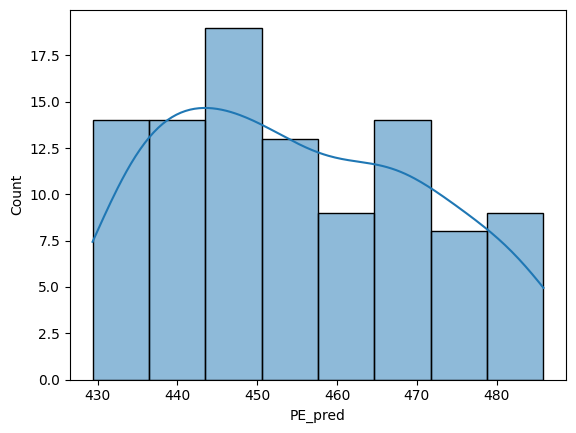

In [45]:
import seaborn as sns
sns.histplot(xnew["PE_pred"], kde=True)

Step 9 - Visualize the decision tree and feature importance

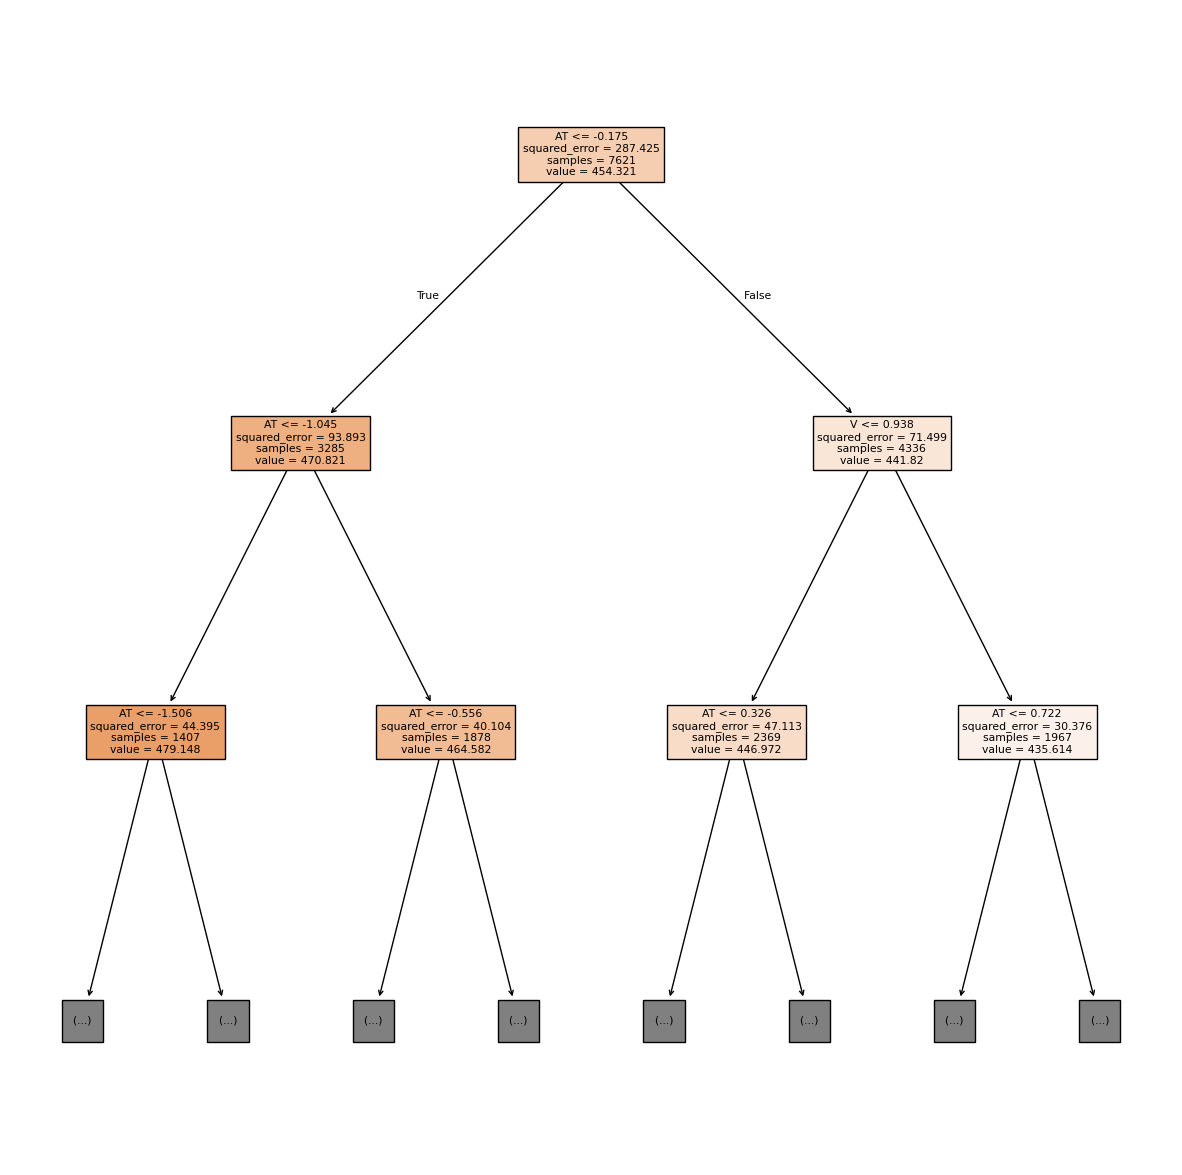

In [46]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 15))
plot_tree(best_dtr, max_depth=2, feature_names=xtrain_pre.columns, filled=True)
plt.show()

In [47]:
best_dtr.feature_importances_

array([0.89932228, 0.08491755, 0.00896521, 0.00679496])

In [48]:
xtrain.columns

Index(['AT', 'V', 'AP', 'RH'], dtype='object')

In [49]:
imp = pd.Series(
    best_dtr.feature_importances_,
    index = xtrain.columns
)
imp

AT    0.899322
V     0.084918
AP    0.008965
RH    0.006795
dtype: float64

<Axes: >

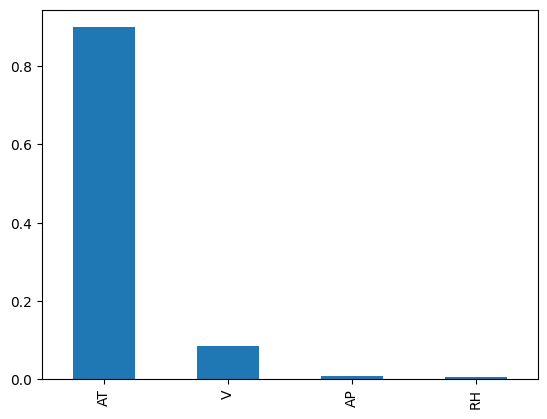

In [50]:
imp.plot(kind="bar")

Step 9 - Save the preprocessor and model object

In [52]:
num_pipe

,steps,"[('simpleimputer', ...), ('standardscaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [53]:
best_dtr

,criterion,'squared_error'
,splitter,'best'
,max_depth,8
,min_samples_split,7
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [54]:
import joblib

joblib.dump(num_pipe, "pre.joblib")

['pre.joblib']

In [55]:
joblib.dump(best_dtr, "power_model.joblib")

['power_model.joblib']

In [56]:
p = joblib.load("pre.joblib")
p

,steps,"[('simpleimputer', ...), ('standardscaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [57]:
m = joblib.load("power_model.joblib")
m

,criterion,'squared_error'
,splitter,'best'
,max_depth,8
,min_samples_split,7
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [58]:
m.score(xtrain_pre, ytrain)

0.95623534781989

In [59]:
m.score(xtest_pre, ytest)

0.9470112451175059